In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.api as s
from sklearn.linear_model import LinearRegression

In [3]:
data = pd.read_csv('C:/Users/Pankaj Aggarwal/Downloads/gasoline.csv')
data

,time,value
0,1991.100000,6.621
1,1991.119165,6.433
2,1991.138330,6.582
3,1991.157495,7.224
4,1991.176660,6.875
...,...,...
1350,2016.972690,9.278
1351,2016.991855,8.465
1352,2017.011020,8.470
1353,2017.030185,8.069


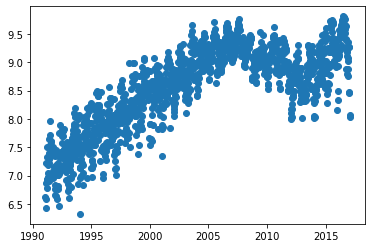

In [4]:
plt.scatter(data['time'], data['value'])

In [5]:
x = data['time']
y= data['value']

In [6]:
x = s.add_constant(x)
model = s.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     1961.
Date:                Wed, 23 Sep 2020   Prob (F-statistic):          1.71e-265
Time:                        18:46:02   Log-Likelihood:                -890.77
No. Observations:                1355   AIC:                             1786.
Df Residuals:                    1353   BIC:                             1796.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -141.7396      3.394    -41.765      0.000    -148.397    -135.082
time           0.0750      0.002     44.286      0.000       0.072       0.078
==============================================================================
Omnibus:                       28.810   Durbin-Watson:                   0.513
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.917
Skew:                          -0.285   Prob(JB):                     2.36e-06
Kurtosis:                       2.633   Cond. No.                     5.36e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.36e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
influence = model.get_influence() 
resid = influence.resid_studentized_external
resid

array([-2.05836244, -2.46651221, -2.14849984, ..., -2.26112479,
       -3.13031833, -3.19842853])

In [8]:
reg = LinearRegression()

In [9]:
x = data['time'].values.reshape(-1,1)
reg.fit(x,y)

LinearRegression()

In [10]:
y_predict = reg.predict(x)

In [11]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_predict,y)

0.2180372863581287

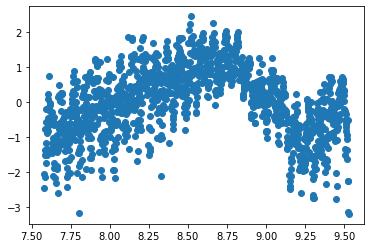

In [12]:
plt.scatter(y_predict, resid)

In [13]:
res = model.resid
res

0      -0.959285
1      -1.148723
2      -1.001160
3      -0.360597
4      -0.711034
          ...   
1350   -0.242574
1351   -1.057011
1352   -1.053448
1353   -1.455885
1354   -1.487323
Length: 1355, dtype: float64

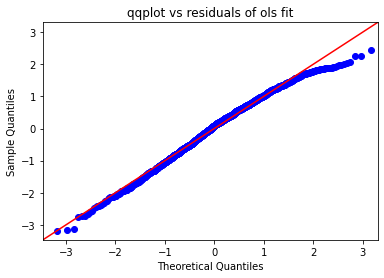

In [14]:
from scipy import stats
prob_plot = s.ProbPlot(res,stats.norm,fit = True)
fig = prob_plot.qqplot(line='45')
plt.title('qqplot vs residuals of ols fit')
plt.show()

In [15]:
z1 = data['time']
z2 = z1**2
z = np.column_stack((z1,z2))
z = s.add_constant(z)

In [16]:
model1 = s.OLS(y,z).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     1991.
Date:                Wed, 23 Sep 2020   Prob (F-statistic):               0.00
Time:                        18:46:04   Log-Likelihood:                -567.87
No. Observations:                1355   AIC:                             1142.
Df Residuals:                    1352   BIC:                             1157.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.311e+04    799.560    -28.909      0.000   -2.47e+04   -2.15e+04
x1            23.0013      0.798     28.826      0.000      21.436      24.567
x2            -0.0057      0.000    -28.732      0.000      -0.006      -0.005
==============================================================================
Omnibus:                       18.384   Durbin-Watson:                   0.826
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.912
Skew:                          -0.289   Prob(JB):                     7.82e-05
Kurtosis:                       2.996   Cond. No.                     3.21e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.21e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
influence = model1.get_influence() 
resid = influence.resid_studentized_external
resid

array([-0.86563291, -1.38991252, -0.99520598, ..., -1.13775491,
       -2.22935909, -2.3077083 ])

In [18]:
z1 = data['time']
z2 = z1**2
z = np.column_stack((z1,z2))
reg.fit(z,y)

LinearRegression()

In [19]:
y_predict1 = reg.predict(z)

In [20]:
mean_squared_error(y_predict1,y)

0.13537727241091146

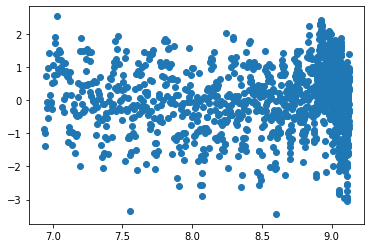

In [21]:
plt.scatter(y_predict1, resid)

In [22]:
res1 = model1.resid
res1

0      -0.317823
1      -0.510103
2      -0.365378
3       0.272350
4      -0.080917
          ...   
1350    0.387544
1351   -0.424064
1352   -0.417667
1353   -0.817266
1354   -0.845860
Length: 1355, dtype: float64

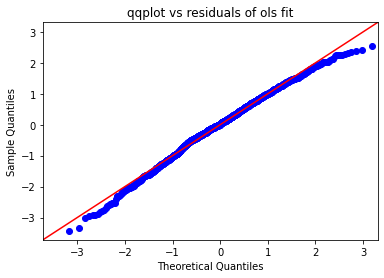

In [23]:
from scipy import stats
prob_plot = s.ProbPlot(res1,stats.norm,fit = True)
fig = prob_plot.qqplot(line='45')
plt.title('qqplot vs residuals of ols fit')
plt.show()

In [24]:
# choosing 2nd model as mean squared error is less plus non curve nature in plot

In [25]:
x = data['time'].values.reshape(-1,1)
y = data['value'].values.reshape(-1,1)
from sklearn.model_selection import train_test_split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 1/3, random_state = 40)

In [27]:
z1 = x_train
z2 = x_train**2
z = np.column_stack((z1, z2))

In [28]:
reg.fit(z,y_train)

LinearRegression()

In [29]:
p1 = x_test
p2 = x_test**2
p = np.column_stack((p1,p2))
y_predict = reg.predict(p)

In [30]:
mean_squared_error(y_predict,y_test)

0.13232783827529182

In [31]:
import seaborn as sns

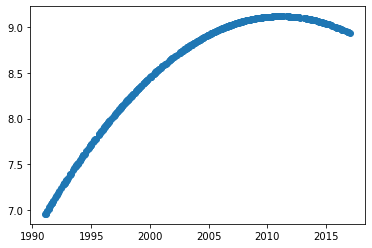

In [32]:
plt.scatter(x_test,y_predict)

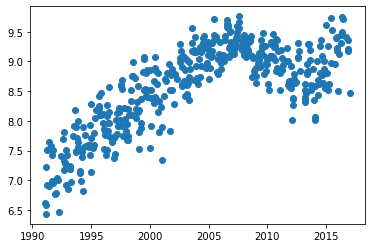

In [33]:
plt.scatter(x_test,y_test)

In [38]:
z1 = x_train
z2 = x_train**2
z = np.column_stack((z1, z2))
z = s.add_constant(z)
model = s.OLS(y_train,z).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     1329.
Date:                Wed, 23 Sep 2020   Prob (F-statistic):          2.42e-269
Time:                        18:50:14   Log-Likelihood:                -385.29
No. Observations:                 903   AIC:                             776.6
Df Residuals:                     900   BIC:                             791.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.181e+04    973.019    -22.411      0.000   -2.37e+04   -1.99e+04
x1            21.6946      0.971     22.342      0.000      19.789      23.600
x2            -0.0054      0.000    -22.265      0.000      -0.006      -0.005
==============================================================================
Omnibus:                       13.896   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.275
Skew:                          -0.308   Prob(JB):                     0.000795
Kurtosis:                       2.999   Cond. No.                     3.16e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.16e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

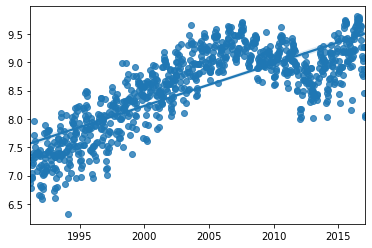

In [41]:
sns.regplot(x_train, y_train, fit_reg=True)